In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import os
os.chdir('C:\\Users\\rpalem\\Documents\\practice\\heart')

In [2]:
train_values= pd.read_csv('train_values.csv',index_col='patient_id')
train_labels= pd.read_csv('train_labels.csv',index_col='patient_id')
test_values= pd.read_csv('test_values.csv',index_col='patient_id')


In [3]:
train_values.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
patient_id,,,,,,,,,,,,,
0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [4]:
train_values.dtypes

slope_of_peak_exercise_st_segment         int64
thal                                     object
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
dtype: object

In [5]:
train_values=pd.get_dummies(train_values)
test_values =pd.get_dummies(test_values)

In [6]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#train_values = scaler.fit_transform(train_values)

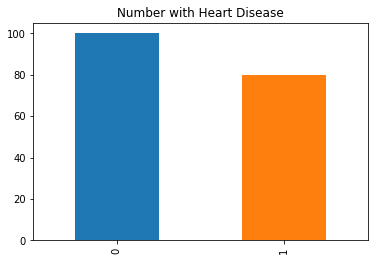

In [10]:
train_labels.heart_disease_present.value_counts().plot.bar(title='Number with Heart Disease')

In [7]:
# for preprocessing the data
from sklearn.preprocessing import StandardScaler

# the model
from sklearn.linear_model import LogisticRegression

# for combining the preprocess with model training
from sklearn.pipeline import Pipeline

# for optimizing parameters of the pipeline
from sklearn.model_selection import GridSearchCV

In [9]:
pipe = Pipeline(steps=[('scale', StandardScaler()), 
                       ('logistic', LogisticRegression())])
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [10]:
param_grid = {'logistic__C': [0.0001, 0.001, 0.01, 1, 10], 
              'logistic__penalty': ['l1', 'l2']}
gs = GridSearchCV(estimator=pipe, 
                  param_grid=param_grid, 
                  cv=3)

In [12]:
gs.fit(train_values, train_labels.heart_disease_present)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logistic__C': [0.0001, 0.001, 0.01, 1, 10], 'logistic__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [13]:
gs.best_params_

{'logistic__C': 0.0001, 'logistic__penalty': 'l2'}

In [16]:
from sklearn.metrics import log_loss

predictions = gs.predict_proba(train_values)
log_loss(train_labels.heart_disease_present, predictions)

0.6858046689847203

## predict submition

In [18]:
predictions = gs.predict_proba(test_values)[:, 1]

In [19]:
submission_format = pd.read_csv('submission_format.csv', index_col='patient_id')

In [20]:
my_submission = pd.DataFrame(data=predictions,
                             columns=submission_format.columns,
                             index=submission_format.index)

In [21]:
my_submission.head()

,heart_disease_present
patient_id,
olalu7,0.500001
z9n6mx,0.493347
5k4413,0.506843
mrg7q5,0.494008
uki4do,0.504491


In [22]:
my_submission.to_csv('submission3.csv')